In [1]:
import numpy as np
import pandas as pd
from scipy.stats import binom

# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(9.5,5)})

# 2. In this section, we will compute some *probabilities* and *likelihoods*.

The binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent trials.

A ***probability*** is a number assigned to a possible outcome, and the sum (or integral) of the probabilities of all possible outcomes in the support of the distrubution is equal to one.

A ***likelihood*** is a number that is assigned to a hypothesis about the underlying paraemters for a distribution.  
* For discrete random variables, the likelihood of the parameters $\theta$ given the outcome $X$, written $L(\theta|X)$, is equal to the probability mass function (PMF) for this outcome given these parameters, $L(\theta|X)=P(X|\theta)$. 
* For continuous random variables, the likelihood of the parameters $\theta$ given the outcome $X$, written $L(\theta|X)$, is equal to the probability desnity function (PDF) for this outcome given these parameters, $L(\theta|X)=f(X|\theta)$.

In summary, the likelihood is a function of the parameters (assuming the outcome is fixed) and the probability (mass/density) function is a funciton of the outcome, assuming the parameters for the distribution are fixed.  But, both are equal to the probability mass/density function for the given outcome and parameters.

In [2]:
from scipy.stats import binom
# set the parameters
param_n = 10 # number of trials
param_p = 0.3 # probability of success in a single trial
k_value = 5 #NOTE: k = the number of successes

# compute the probability/likelihood
p = binom.pmf(k=k_value, n=param_n, p=param_p) 

print('For the discrete binomial distribution:')
print(f'L(n={param_n},p={param_p}|k={k_value}) = p(k={k_value}|n={param_n},p={param_p}) = {p}')

For the discrete binomial distribution:
L(n=10,p=0.3|k=5) = p(k=5|n=10,p=0.3) = 0.10291934519999989


In [3]:
from scipy.stats import norm
# set the parameters
param_loc = 3 # mean
param_scale = 2 # standard deviation
x_value = 5

# compute the probability/likelihood
p = norm.pdf(x=x_value, loc=param_loc,scale=param_scale)

print('For the continuous gaussian distribution:')
print(f'L(\u03BC={param_loc},\u03C3={param_scale}|x={x_value}) = f(x={x_value}|\u03BC={param_loc},\u03C3={param_scale}) = {p}')
# See https://gist.github.com/beniwohli/765262 for the unicodes for the greek alphabet 

For the continuous gaussian distribution:
L(μ=3,σ=2|x=5) = f(x=5|μ=3,σ=2) = 0.12098536225957168


# 3. Using Bayes Theorem

Bayes theorem is:
$$
P(\theta | X) = \frac{P(X|\theta)P(\theta)}{P(X)},
$$
where: 
* $P(\theta | X)$ is the probability for the parameter is $\theta$ given the observed outcom $X$.
* $P(X|\theta)$ the likelihood for the probability distribution.  It is standard to use the discrite case notation, in which this is the probability of getting the outcome $X$ if $\theta$ is the underlying parameter for the distribution.
* $P(\theta)$ is the prior probability for $\theta$
* $P(X)$ is the probability of getting $X$ as an outcome.

Note that if we there are only a finite number of possible values $\{\theta_1,\theta_2,...,\theta_N\}$ for the parameter $\theta$, then we can compute $P(X)$ by
$$
P(X) = P(X|\theta_1)P(\theta_1) + P(X|\theta_2)P(\theta_2) +\cdots + P(X|\theta_N)P(\theta_N).
$$
This is called the 'normalization' or 'conditioning' formula.  If there is a continuous set of possible $\theta$ values, for example an interval $[a,b]$, this sum is replaced by an integral.

**QUESTION 1:** Suppose that we have a coin that is either fair (p=0.5 where p is the probaiblity of getting heads) or unfiar with p=0.1.  We have flipped a coin 50 times and got heads 21 times.  What is the probability that this coin is fair?

**ANSWER**:  Notice that this question is really asking about the underlying parameter for the probability distribution for the coin flip: is p=0.5 or is p=0.1?  So we are going to use Bayes theorem to compute these two probabilities.

To start, we are going to be using the binomial probability distribution - for given parameter values for $n$ flips of a coin that has probability $p$ of getting heads, the probability probability of getting $k$ heads is:
$$
P(k|n,p)={n \choose k}p^k(1-p)^{n-k}.
$$

For our given problem:
* In Bayes Theorem, $\theta$ represents the parameter(s) for the distribution, which in this case is $n=50, p=0.5$ or $n=50, p=0.1$.
* In Bayes Theorem, $X$ represented the observed outcome, which in this case is $k=21$ heads out of our coin flips.
* We are not told any information about the prior probability, we are going to assume the possible parameters have the same prio probability, $P(n=50, p=0.5)=P(n=50, p=0.1)=0.5$.

Bayes Theorem is then:
$$
P(n=50, p=0.5|k=21)=\frac{P(k=21|n=50, p=0.5)P(n=50, p=0.5)}{P(k=21)}.
$$

Now, using the fact that the prior probability is 0.5 and using the normlization formula:
$$
P(n=50, p=0.5|k=21)=\frac{P(k=21|n=50, p=0.5)0.5}{P(k=21|n=50, p=0.1)0.5+P(k=21|n=50, p=0.5)0.5}.
$$

So all we really nedd to compute are the likelihoods $P(k=21|n=50, p=0.1)$ and $P(k=21|n=50, p=0.5)$.

In [4]:
from scipy.stats import binom

# compute the likelihoods
k_value, param_n, param_p = 21, 50, 0.5,
L1 = binom.pmf(k=k_value, n=param_n, p=param_p) 
print(f'L(n={param_n},p={param_p}|k={k_value}) = p(k={k_value}|n={param_n},p={param_p}) = {L1}')
k_value, param_n, param_p = 21, 50, 0.1 
L2 = binom.pmf(k=k_value, n=param_n, p=param_p) 
print(f'L(n={param_n},p={param_p}|k={k_value}) = p(k={k_value}|n={param_n},p={param_p}) = {L2}')

L(n=50,p=0.5|k=21) = p(k=21|n=50,p=0.5) = 0.05979878464650326
L(n=50,p=0.1|k=21) = p(k=21|n=50,p=0.1) = 3.17120935812694e-09


Now we can input these into our formula above to get the probability that the coin is fair.

In [ ]:
N1 = L1*0.5
print(f'Numerator for p=0.5: {N1}')
N2 = L2*0.5
print(f'Numerator for p=0.1: {N2}')
D = L1*0.5 + L2*0.5
print(f'Denominator: {D}')
print(f'Probability that the coin is fair = P(n=50,p=0.5|k=21) = {N1/D}')
print(f'Probability that the coin is not fair with p=0.1 = P(n=50,p=0.1|k=21) = {N2/D}')

**QUESTION 2:** Suppose that we have flipped a coin 50 times and got heads 21 times. Estimate the probability distribution for the probability $p$ for getting heads of a single coin toss.  Do this first by assuming that $p$ has one of the values $𝑝=0,𝑝=0.01,𝑝=0.02,...,𝑝=0.98,𝑝=0.99,𝑝=1$ and has a discrete distribution, then use this to approximate the PDF for a continuous distribution for $p$.

**ANSWER:** We are going to use the same formulas as above, but for $p=0,p=0.01,p=0.02,...,p=0.98,p=0.99,p=1$.

In [5]:
from scipy.stats import binom

# create an array of possible values for p
x = np.arange(0, 1, 0.01)
print(f'x = {x}')

# compute the likelihoods for each of these
L = binom.pmf(k=21, n=50, p=x)
print(f'L = {L}')

# compute the denominator in Bayes Theorem (i.e. the normalizing factor)
prior_prob = 1/len(L)
D = np.sum(L*prior_prob)
print(f'D = {D}')

# now compute the probability for each x-vaue using Bayes Theorem
P= L*prior_prob / D
print(f'P={P}')


x = [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
L = [0.00000000e+00 5.03051889e-29 7.85919826e-23 2.91151333e-19
 9.06395450e-17 7.25348613e-15 2.45513938e-13 4.58412540e-12
 5.53259475e-11 4.78063092e-10 3.17120936e-09 1.69726135e-08
 7.60318924e-08 2.93130403e-07 9.93884633e-07 3.01479250e-06
 8.29489842e-06 2.09355401e-05 4.89233815e-05 1.06680074e-04
 2.18490054e-04 4.22652048e-04 7.75911013e-04 1.35739963e-03
 2.27102750e-03 3.64509592e-03 5.62797708e-03 8.37903745e-03
 1.20546109e-02 1.67896719e-02 2.26767938e-02 2.97448198

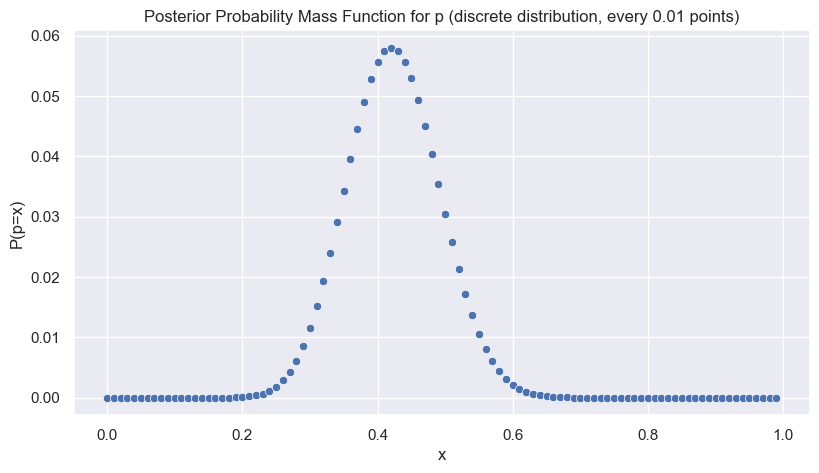

In [7]:
import pandas as pd
import seaborn as sns
ax = sns.scatterplot(pd.DataFrame({"x": x, "P": P}), x = "x", y = "P")
ax.set(xlabel='x', ylabel='P(p=x)', title=f'Posterior Probability Mass Function for p (discrete distribution, every 0.01 points)');

Note that we use filled circle markers in this plot because this represents a discte distribution.  The sum of the all of the values is 1.

To compute the PDF for the continuous case, we will change the normalizing/conditioning constant to an integral:
$$
P(X)=\int_0^1 P(\theta|X)P(\theta)d\theta \approx \sum_i P(\theta_i|X) P(\theta_i)\Delta \theta
$$


In [8]:
# compute the denominator in Bayes Theorem (i.e. the normalizing factor) approximating the integral
prior_prob = 1/len(L)
delta_theta = 0.01
D = np.sum(L*prior_prob*delta_theta)
print(f'D = {D}')

# now compute the probability for each x-value using Bayes Theorem
P= L*prior_prob / D
print(f'P={P}')

D = 0.00019607843137254904
P=[0.00000000e+00 2.56556463e-27 4.00819111e-21 1.48487180e-17
 4.62261679e-15 3.69927793e-13 1.25212109e-11 2.33790395e-10
 2.82162332e-09 2.43812177e-08 1.61731677e-07 8.65603289e-07
 3.87762651e-06 1.49496506e-05 5.06881163e-05 1.53754418e-04
 4.23039820e-04 1.06771254e-03 2.49509246e-03 5.44068377e-03
 1.11429928e-02 2.15552544e-02 3.95714616e-02 6.92273812e-02
 1.15822402e-01 1.85899892e-01 2.87026831e-01 4.27330910e-01
 6.14785154e-01 8.56273267e-01 1.15651648e+00 1.51698581e+00
 1.93495260e+00 2.40283712e+00 2.90799533e+00 3.43303784e+00
 3.95670870e+00 4.45527439e+00 4.90429788e+00 5.28061226e+00
 5.56427257e+00 5.74026108e+00 5.79974940e+00 5.74077728e+00
 5.56828308e+00 5.29350224e+00 4.93282623e+00 4.50627355e+00
 4.03575940e+00 3.54335858e+00 3.04973802e+00 2.57289662e+00
 2.12729842e+00 1.72342925e+00 1.36775525e+00 1.06302064e+00
 8.08795082e-01 6.02170530e-01 4.38510102e-01 3.12166580e-01
 2.17109248e-01 1.47422053e-01 9.76589607e-02 6.30614356

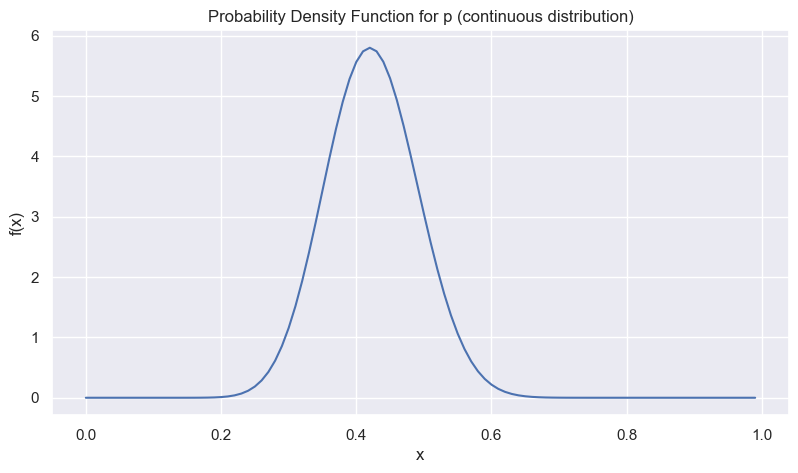

In [10]:
ax = sns.lineplot(data = pd.DataFrame({"x": x, "P": P}), x = "x", y = "P")
ax.set(xlabel='x', ylabel='f(x)', title=f'Probability Density Function for p (continuous distribution)');

This cruve represents a continuous probability distribution.  Its integral, equal to the area under the curve, is 1. (or approximately 1, since this plot is a numerical approximation...)

# 4. CHALLENGE QUESTION - ANSWER

Here is a challenge question if you want to test your understanding, and see if you can extend the use of Bayes Theorem above to a 2D distribution.

Suppose you have a single observation $x=4.2$ and you believe it was generated by a normal distribution.  Estimate the probability distribution for the parameters $\mu$ and $\sigma$ of the normal distribution which generated $x=4.2$. (Since we are estimating a distribution for $\mu$ and $\sigma$, this is called a joint distribution, but the principles are the same, just in 2-dimensions.)  

Do this first by computing $P(\mu=x, \sigma=y)$ for all values of $(x,y)$ in a grid with $x$ in the interval $[-10,10]$ and y in the interval $[0,10]$ with a stepsize of $0.1$.   Assume that the distribution is continuous, so you have to normalize/condition by an integral.  The Python Code for generating the X and Y values is provided below along with some plotting code.  You just have to compute the formula for $Z = P(\mu=x, \sigma=y)$.

In [11]:
from scipy.stats import norm

# Create the Y,Y grid
delta_x = 0.1
delta_y = 0.1
X, Y = np.meshgrid(np.arange(2.5, 7.5, delta_x), np.arange(0.1, 2, delta_y))
# X, Y = np.meshgrid(np.arange(3, 5, 0.01), np.arange(0.1, 2, 0.01))

# compute the likelihoods for each of these

# compute the probability/likelihood
L = norm.pdf(x=4.2, loc=X, scale=Y)
print(f'L = {L}')

# compute the denominator in Bayes Theorem (i.e. the normalizing factor)
prior_prob = 1/len(L)
D = np.sum(L*(delta_x*delta_y)*prior_prob)
print(f'D = {D}')

# now compute the probability for each x-vaue using Bayes Theorem
P= L*prior_prob / D
print(f'P={P}')


Z = P

L = [[7.00418213e-063 1.02616307e-055 5.53070955e-049 1.09660656e-042
  7.99882776e-037 2.14638374e-031 2.11881925e-026 7.69459863e-022
  1.02797736e-017 5.05227108e-014 9.13472041e-011 6.07588285e-008
  1.48671951e-005 1.33830226e-003 4.43184841e-002 5.39909665e-001
  2.41970725e+000 3.98942280e+000 2.41970725e+000 5.39909665e-001
  4.43184841e-002 1.33830226e-003 1.48671951e-005 6.07588285e-008
  9.13472041e-011 5.05227108e-014 1.02797736e-017 7.69459863e-022
  2.11881925e-026 2.14638374e-031 7.99882776e-037 1.09660656e-042
  5.53070955e-049 1.02616307e-055 7.00418213e-063 1.75874954e-070
  1.62463604e-078 5.52094836e-087 6.90202942e-096 3.17428155e-105
  5.37056037e-115 3.34271444e-125 7.65392974e-136 6.44725997e-147
  1.99788926e-158 2.27757748e-170 9.55169454e-183 1.47364613e-195
  8.36395161e-209 1.74636626e-222]
 [4.08311782e-016 2.52613554e-014 1.21716027e-012 4.56736020e-011
  1.33477831e-009 3.03794142e-008 5.38488002e-007 7.43359757e-006
  7.99187055e-005 6.69151129e-004 4.3

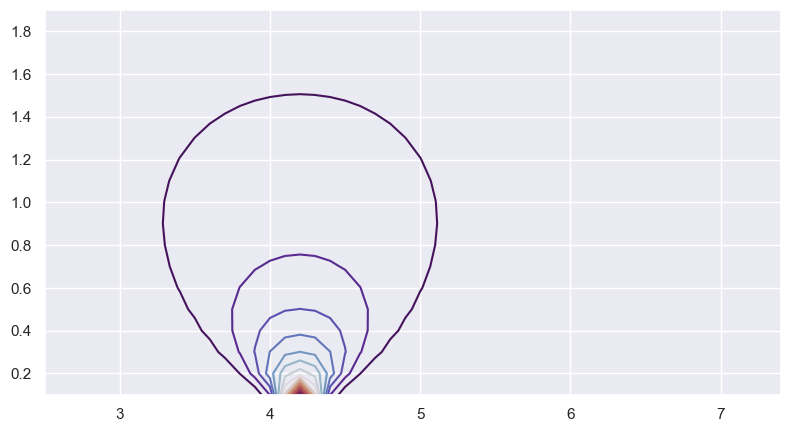

In [12]:
plt.contour(X, Y, Z, 20, cmap='twilight_shifted');

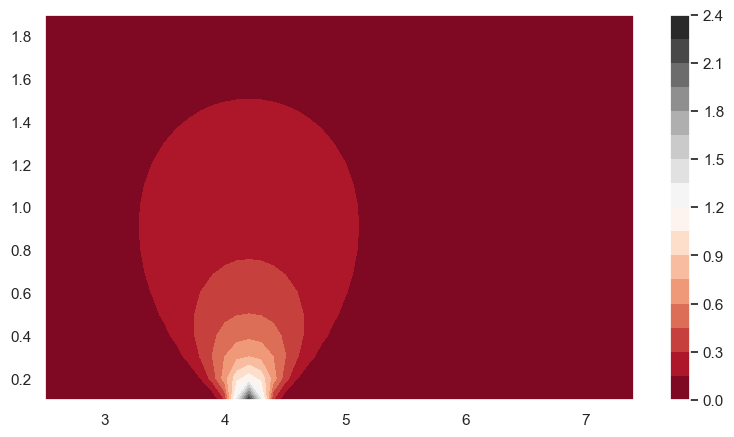

In [13]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

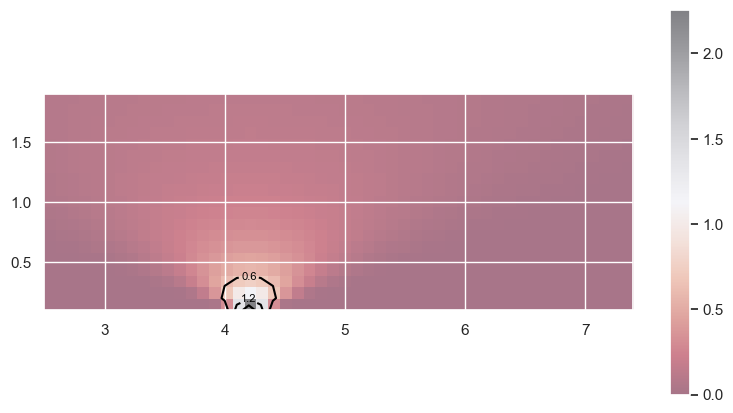

In [14]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

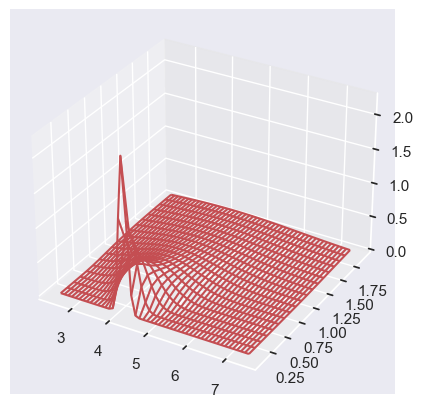

In [15]:
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='r');

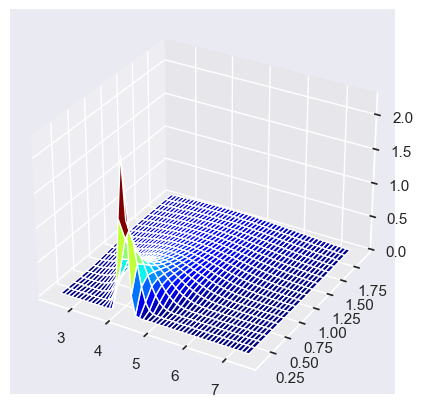

In [16]:
ax = plt.axes(projection='3d');
ax.plot_surface(X, Y, Z, cmap='jet');

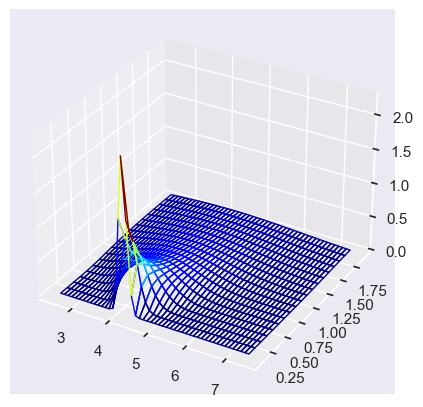

In [17]:
from matplotlib import cm# Normalize the colors based on Z value
norm = plt.Normalize(Z.min(), Z.max())
colors = cm.jet(norm(Z))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, Z, facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))

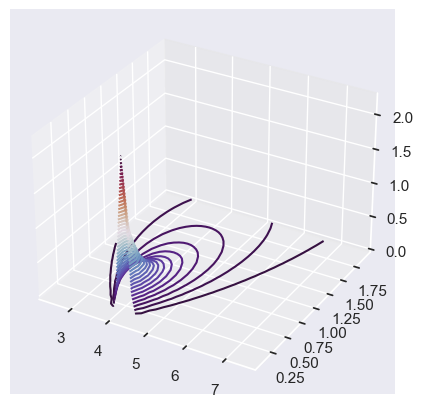

In [18]:
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 55, cmap='twilight_shifted');

# 5. PRIORS

In this section we will present common methods for including a prior probability distribtuion.

**5. 1 UNINFORMATIVE PRIOR** One option is to choose a prior probability distribution that adds very little information.  This was what we used in the previous example, repeated here (without the test output).  The prior is constant, which is a common choice when the domain for the parameters is either finite (for discrete distributions) or finite lenght (for continuous distributions).

In [19]:
x[1]-x[0]

0.01

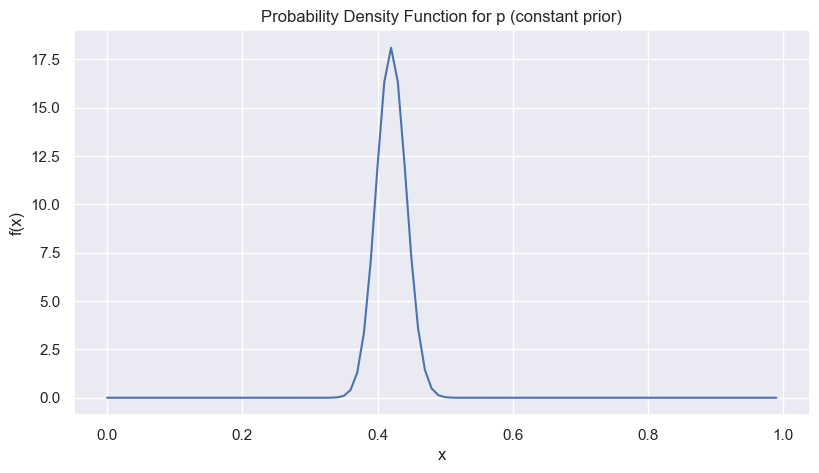

In [21]:
from scipy.stats import binom

# create an array of possible values for p
x = np.arange(0, 1, 0.01)

# compute the likelihoods for each of these
L = binom.pmf(k=210, n=500, p=x)

# compute the denominator in Bayes Theorem (i.e. the normalizing factor) approximating the integral
prior_prob = 1/len(L)
delta_theta = 0.01
D = np.sum(L*prior_prob*delta_theta)

# now compute the probability for each x-value using Bayes Theorem
P= L*prior_prob / D

ax = sns.lineplot(pd.DataFrame({"x": x, "P": P}), x = "x", y = "P")
ax.set(xlabel='x', ylabel='f(x)', title=f'Probability Density Function for p (constant prior)');

**5.2 EXPERT KNOWLEDGE PRIORS:** If an expert has some knowledge about that are likely values of the parameters, they can be used to create a prior.  This can be useful, but also very subjective.

Suppose we want to use our intuition that most coins are fair.  We could assume a prior probabiltiy for p that is normal with mean of 0.5 and a very small standard deviation:

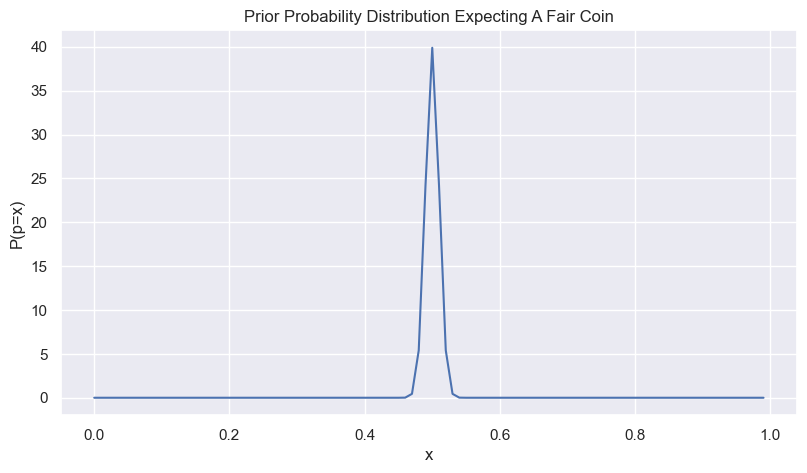

In [23]:
from scipy.stats import norm

param_mean_for_prior = 0.5
param_stdv_for_prior = 0.01

prior_prob_expert = norm.pdf(x=x, loc=param_mean_for_prior, scale=param_stdv_for_prior)

# plot the prior distribution
ax = sns.lineplot(data = pd.DataFrame({"x": x, "prior_prob_expert": prior_prob_expert}), x = "x", y = "prior_prob_expert")
ax.set(xlabel='x', ylabel='P(p=x)', title=f'Prior Probability Distribution Expecting A Fair Coin');

Now we can compute the posterior probability distribution using this prior.  We plot this with the distribution using the flat prior for comparison.

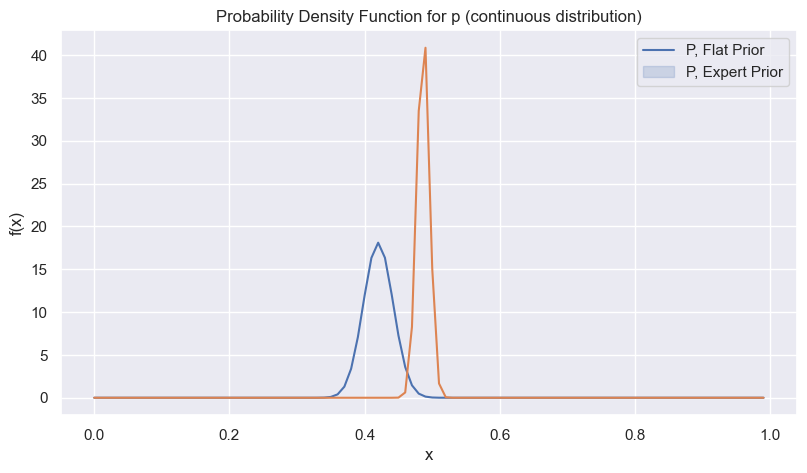

In [27]:
D = np.sum(L*prior_prob_expert*delta_theta)

# now compute the probability for each x-value using Bayes Theorem
P_expert_prior= L*prior_prob_expert / D

ax = sns.lineplot(data = pd.DataFrame({"x": x, "P": P}), x = "x", y = "P")
ax = sns.lineplot(data = pd.DataFrame({"x": x, "P_expert_prior": P_expert_prior}), x = "x", y = "P_expert_prior")
ax.set(xlabel='x', ylabel='f(x)', title=f'Probability Density Function for p (continuous distribution)');
plt.legend(labels=['P, Flat Prior', 'P, Expert Prior']);

We see that using an expert prior shifted the posterior probability toward a fair distribution.
QUESTION: What would you expect if:
1. The standard deviation on the prior were smaller?
2. There were more tirals with the same proportion of success in the initial data (i.e. n=500, k=210)?

Suggestion: Mofidy the previous code to see if your answers are correct.

**5.3 Conjugate Priors** Conjugate priors are priors that have a functional form that is works well with the form for the likelihood function to make computation of the posterior probability much easier.  The word 'conjugate' means coupled, or paired.

In practice, usually we are presented with a situation that determines the form for the likelihood function, and we have a choice of what prior to use.  Choosing a conjugate prior allows us to find an analytic formula for the posterior probability instead of the numerical integral methods using in Sections 5.1 and 5.2

EXAMPLE: Binomial likelihood with Beta prior yeilds a Beta posterior.

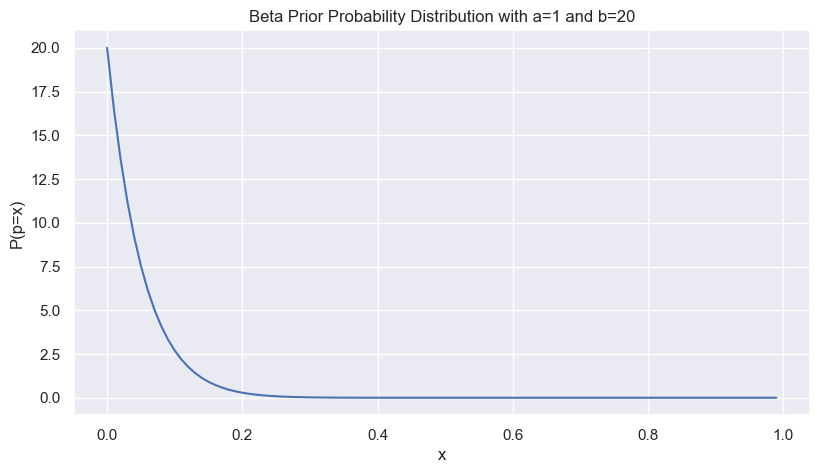

In [29]:
from scipy.stats import beta

# create our beta prior
param_prior_a = 1
param_prior_b = 20
prior_prob = beta.pdf(x=x, a=param_prior_a, b=param_prior_b)

# plot the prior distribution
ax = sns.lineplot(data = {"x": x, "prior_prob": prior_prob}, x = "x", y = "prior_prob")
ax.set(xlabel='x', ylabel='P(p=x)', title=f'Beta Prior Probability Distribution with a={param_prior_a} and b={param_prior_b}');

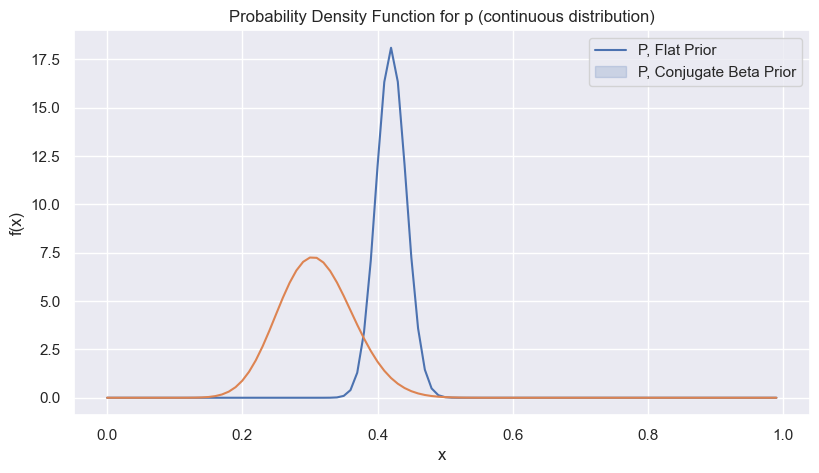

In [32]:
from scipy.stats import binom
from scipy.stats import beta

# create an array of possible values for p
x = np.arange(0, 1, 0.01)

# compute the likelihoods for each of these
param_k = 21
param_n = 50
L = binom.pmf(k=param_k, n=param_n, p=x)

# compute the denominator in Bayes Theorem (i.e. the normalizing factor) approximating the integral
delta_theta = 0.01
D_beta_prior = np.sum(L*prior_prob*delta_theta)

# now compute the probability for each x-value using Bayes Theorem
P_beta_prior= L*prior_prob / D_beta_prior

ax = sns.lineplot(data = pd.DataFrame({"x": x, "P": P}), x = "x", y = "P")
ax = sns.lineplot(data = pd.DataFrame({"x": x, "P_beta_prior": P_beta_prior}), x = "x", y = "P_beta_prior")
ax.set(xlabel='x', ylabel='f(x)', title=f'Probability Density Function for p (continuous distribution)');
plt.legend(labels=['P, Flat Prior', 'P, Conjugate Beta Prior']);

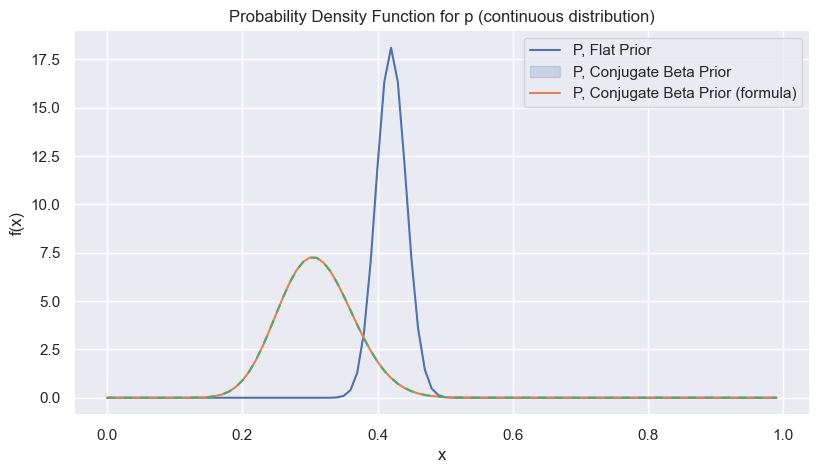

In [34]:
# create our posterior
param_posterior_a = param_k + param_prior_a
param_posterior_b = param_n - param_k + param_prior_b

# now compute the probability using the fact that the posterior probability is a beta distribution
P_beta_prior_formula= beta.pdf(x=x, a=param_posterior_a, b=param_posterior_b)

ax = sns.lineplot(data = {"x": x, "P": P}, x = "x", y = "P")
ax = sns.lineplot(data = {"x": x, "P_beta_prior": P_beta_prior}, x = "x", y = "P_beta_prior")
ax = sns.lineplot(data = {"x": x, "P_beta_prior_formula": P_beta_prior_formula}, x = "x", y = "P_beta_prior_formula", style=True, dashes=[(4,4)])
ax.set(xlabel='x', ylabel='f(x)', title=f'Probability Density Function for p (continuous distribution)');
plt.legend(labels=['P, Flat Prior', 'P, Conjugate Beta Prior', 'P, Conjugate Beta Prior (formula)']);

The primary benefit with conjugate priors is that we get analytic formular for the posterior distribution.  We could even create a function that allows a user to input paramter values, and outputs a posterior using a formula.

In [35]:
from scipy.stats import binom
from scipy.stats import beta

def posterior_from_conjugate_prior(**kwargs):
    if kwargs['Likelihood_Dist_Type'] == 'Binomial':
        # Get the parameters for the likelihood and prior distribution from the key word arguments.
        x = kwargs['x'] # This is state space of possible values for p = 'probability of success' in [0,1]
        n = kwargs['n'] # This is the number of Bernoili trials.
        k = kwargs['k'] # This is the number of 'successes'.
        a = kwargs['a'] # This is the parameter alpha for the prior Beta distribution
        b = kwargs['b'] # This is the parameter beta for the prior Beta distribution
        
        print(f'a_prime = {k + a}.')
        print(f'b_prime = {n - k + b}.')
        Likelihood = binom.pmf(p=x, n=n, k=k)
        Prior = beta.pdf(x=x, a=a, b=b)
        Posterior = beta.pdf(x=x, a=k+a, b=n-k+b)
        
        return [Prior, Likelihood, Posterior]
                    
    else:
        print('Distribution type not supported.')    


a_prime = 21.
b_prime = 281.
a_prime = 51.
b_prime = 51.


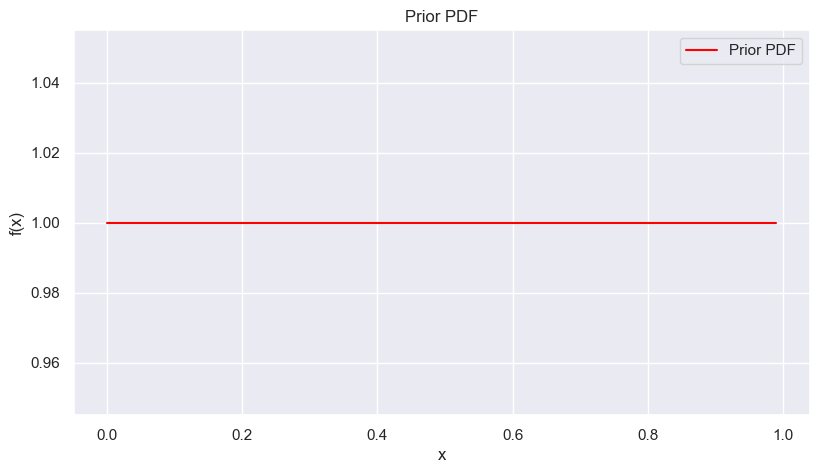

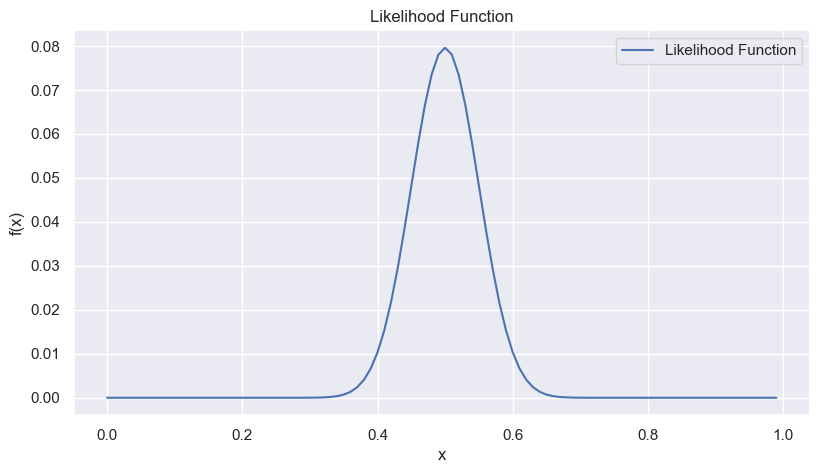

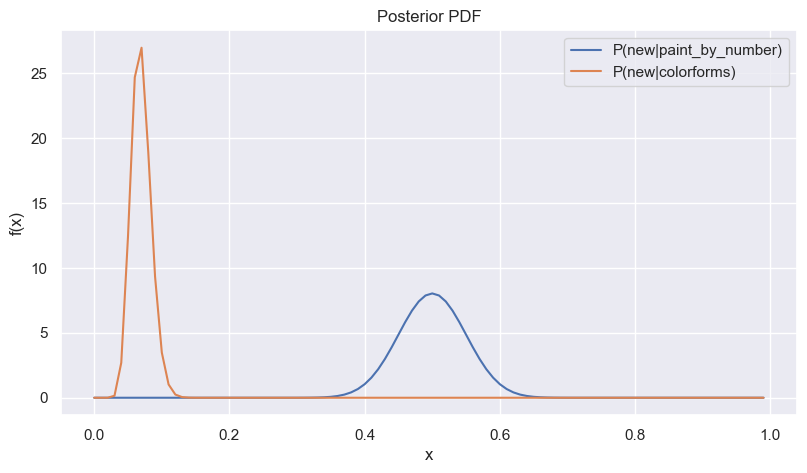

In [38]:
x = np.arange(0, 1, 0.01)
Prior, Likelihood, Posterior_colorforms = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=300, 
    k=20, 
    a=1, 
    b=1)  

Prior, Likelihood, Posterior_paint_by_number = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=100, 
    k=50, 
    a=1, 
    b=1)

ax1 = sns.lineplot(data = {"x": x, "Prior": Prior}, x = "x", y = "Prior", color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(data = {"x": x, "Likelihood": Likelihood}, x = "x", y = "Likelihood")
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(data = {"x": x, "Posterior_paint_by_number": Posterior_paint_by_number}, x = "x", y = "Posterior_paint_by_number", label='P(new|paint_by_number)')
ax3 = sns.lineplot(data = {"x": x, "Posterior_colorforms": Posterior_colorforms}, x = "x", y = "Posterior_colorforms", label='P(new|colorforms)')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend();
plt.show()

# 6. CHALLENGE QUESTION

Modify the code from Section 5 to and add tha ability to use the posterior_from_conjugate_prior function to outout the posterior probability parameters given parameters and for a Guassian Likelihood with known variance $\sigma^2$, and create the Prior, Likelihood, Posterior plots.

In [ ]:
from scipy.stats import binom
from scipy.stats import beta
from scipy.stats import norm

def posterior_from_conjugate_prior(**kwargs):
    if kwargs['Likelihood_Dist_Type'] == 'Binomial':
        # Get the parameters for the likelihood and prior distribution from the key word arguments.
        x = kwargs['x'] # This is state space of possible values for p = 'probability of success' in [0,1]
        n = kwargs['n'] # This is the number of Bernoili trials.
        k = kwargs['k'] # This is the number of 'successes'.
        a = kwargs['a'] # This is the parameter alpha for the prior Beta distribution
        b = kwargs['b'] # This is the parameter beta for the prior Beta distribution
        
        print(f'a_prime = {k + a}.')
        print(f'b_prime = {n - k + b}.')
        Likelihood = binom.pmf(p=x, n=n, k=k)
        Prior = beta.pdf(x=x, a=a, b=b)
        Posterior = beta.pdf(x=x, a=k+a, b=n-k+b)
        
        return [Prior, Likelihood, Posterior]
    
    elif kwargs['Likelihood_Dist_Type'] == 'Gaussian_Known_Variance':
        # Get the parameters for the likelihood and prior distribution from the keyword arguments.
        x = kwargs['x'] # This is state space of possible values for p = 'probability of success' in [0,1]
        mu = kwargs['mu'] # This is the number of Bernoili trials.
        var = kwargs['var'] # This is the number of 'successes'.
        n = kwargs['n'] # This is the parameter alpha for the prior Beta distribution
        prior_mu = kwargs['prior_mu'] # This is the parameter beta for the prior Beta distribution
        prior_var = kwargs['prior_var'] # This is the parameter beta for the prior Beta distribution
        

        Likelihood = -1
        Prior = -1
        Posterior = -1
        
        return [Prior, Likelihood, Posterior]
    
    else:
        print('Distribution type not supported.') 
        return -1, -1, -1
        

In [ ]:
x = np.arange(-100, 200, 0.01)
Prior, Likelihood, Posterior = posterior_from_conjugate_prior(Likelihood_Dist_Type='Gaussian_Known_Variance', x=x, mu=50, var=21, n=2000, prior_mu=0, prior_var=1)    

In [ ]:
ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()

The following call will give you a posteriror with more uncertainty.  What 2 things are different here that has increased the uncertainty?

In [ ]:
x = np.arange(-100, 200, 0.01)
Prior, Likelihood, Posterior = posterior_from_conjugate_prior(Likelihood_Dist_Type='Gaussian_Known_Variance', x=x, mu=50, var=21, n=5, prior_mu=0, prior_var=10000)   

In [ ]:
ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()